In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
# Loading the dataset
data = pd.read_csv("kc_house_data.csv")

In [3]:
# Displaying the first few rows of the dataset
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Descriptive statistics of the dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


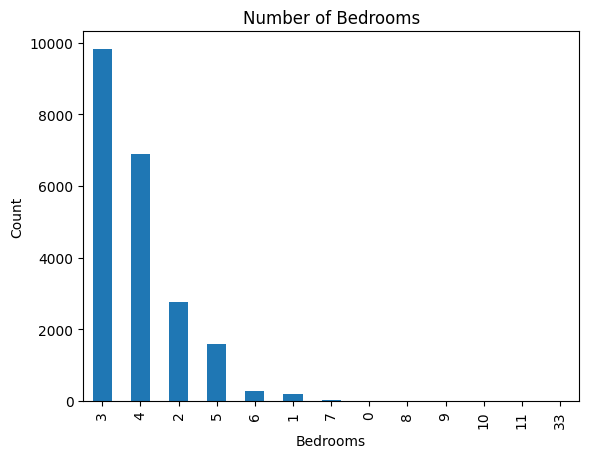

In [5]:
# Visualizing the distribution of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

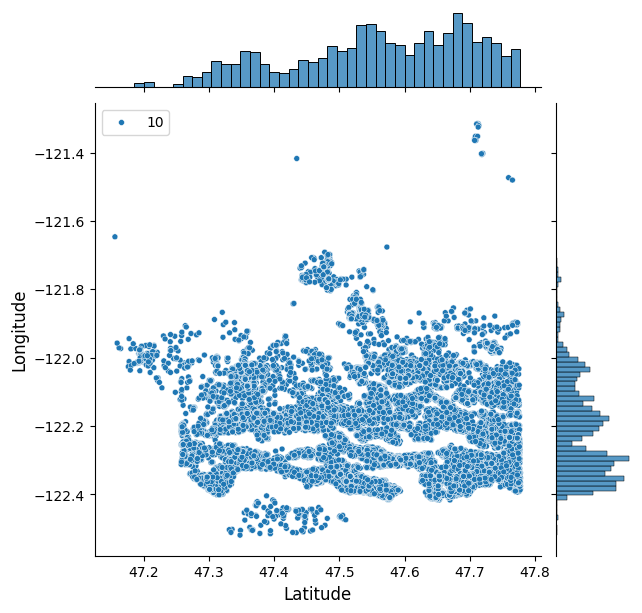

In [6]:
# Joint plot for latitude and longitude
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

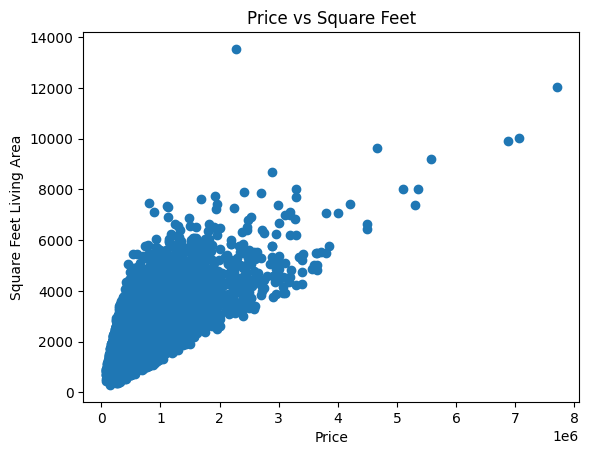

In [7]:
# Scatter plot for price vs square feet living area
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet Living Area")
plt.show()

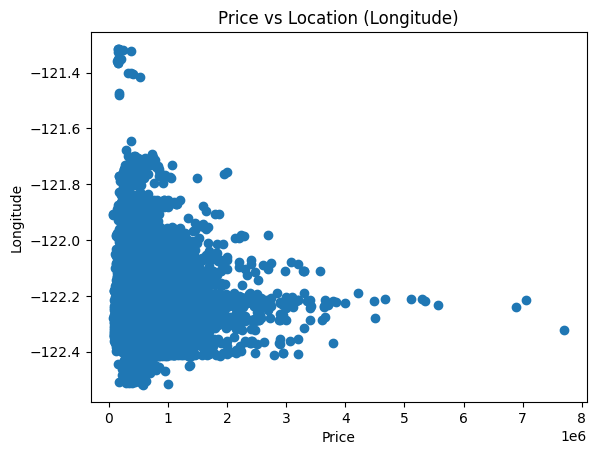

In [8]:
# Scatter plot for price vs location (long)
plt.scatter(data.price, data.long)
plt.title("Price vs Location (Longitude)")
plt.xlabel("Price")
plt.ylabel("Longitude")
plt.show()

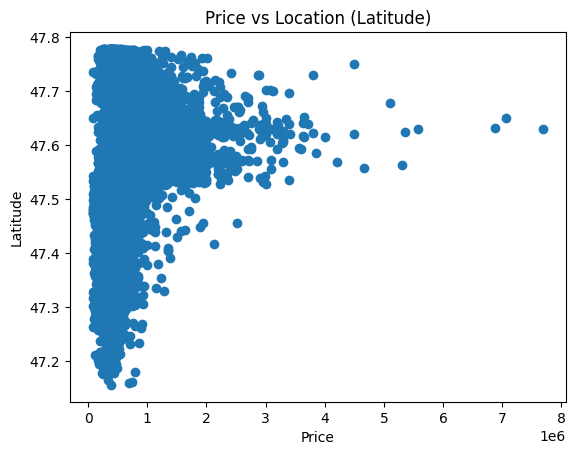

In [9]:
# Scatter plot for price vs location (lat)
plt.scatter(data.price, data.lat)
plt.title("Price vs Location (Latitude)")
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.show()

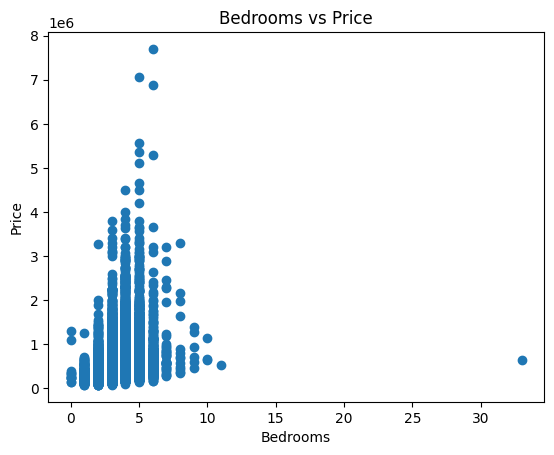

In [10]:
# Scatter plot for bedrooms vs price
plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

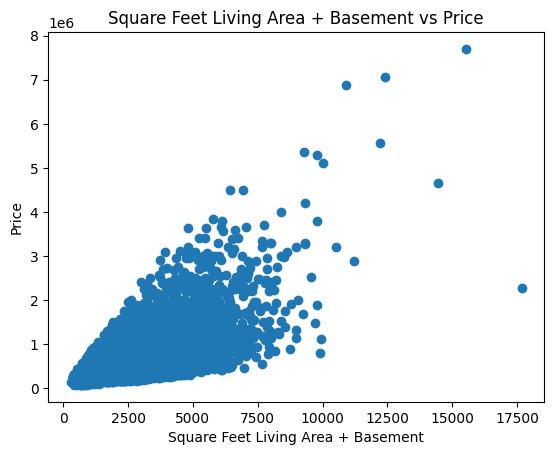

In [11]:
# Scatter plot for square feet living area + basement vs price
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Square Feet Living Area + Basement vs Price")
plt.xlabel("Square Feet Living Area + Basement")
plt.ylabel("Price")
plt.show()

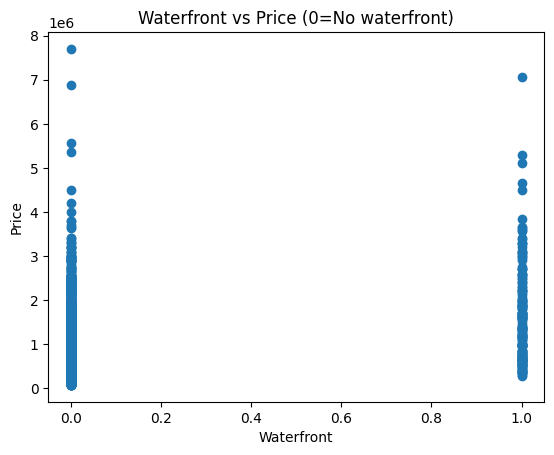

In [12]:
# Scatter plot for waterfront vs price
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0=No waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()


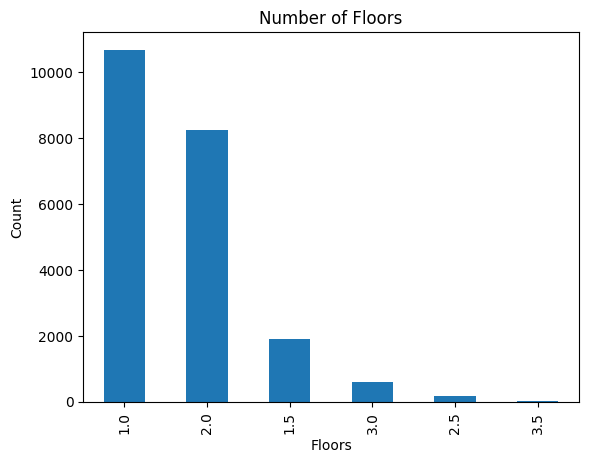

In [13]:
# Bar plot for floors distribution
data.floors.value_counts().plot(kind='bar')
plt.title("Number of Floors")
plt.xlabel("Floors")
plt.ylabel("Count")
plt.show()

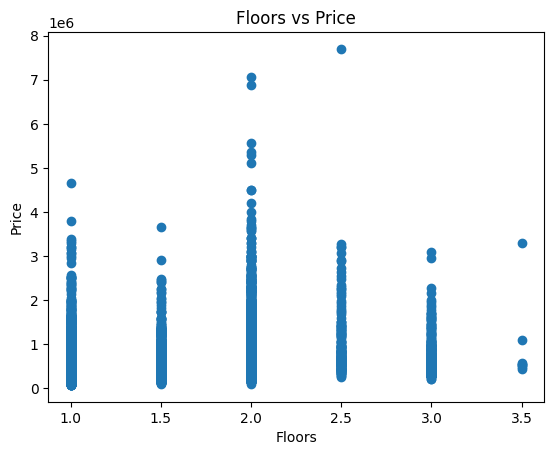

In [14]:
# Scatter plot for floors vs price
plt.scatter(data.floors, data.price)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

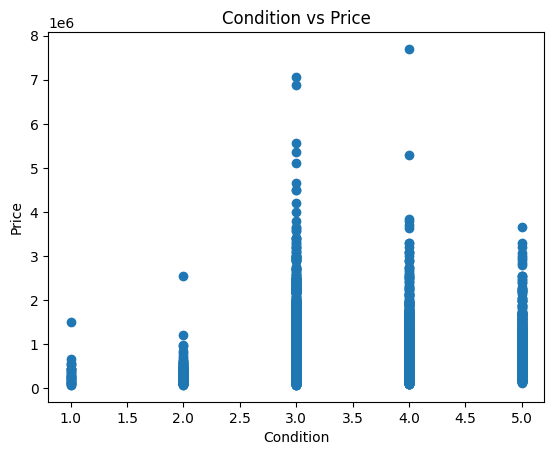

In [15]:
# Scatter plot for condition vs price
plt.scatter(data.condition, data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()


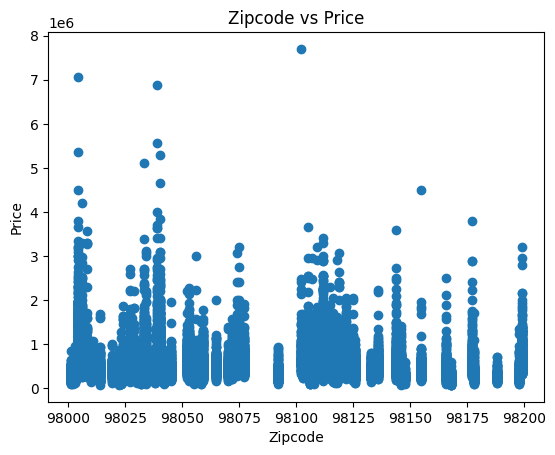

In [16]:
# Scatter plot for zipcode vs price
plt.scatter(data.zipcode, data.price)
plt.title("Zipcode vs Price")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()

In [17]:
# Preprocessing and modeling
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10, random_state = 2)
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.7320342760357731

In [19]:
# Gradient Boosting Regressor model
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


0.9195175882626541

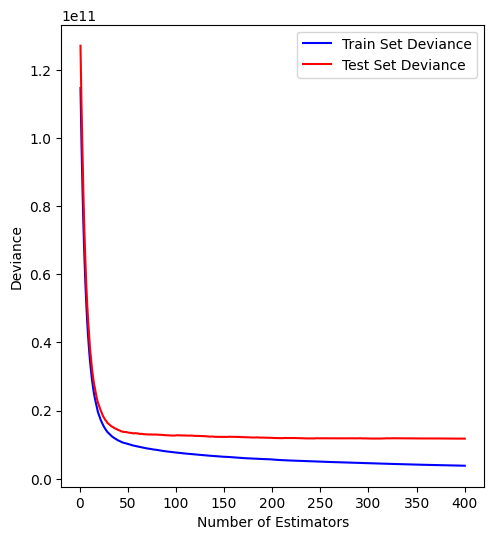

In [26]:
# Plotting training and test set deviance
testsc = np.arange(clf.n_estimators) + 1
train_score = np.zeros((clf.n_estimators,), dtype=np.float64)
test_score = np.zeros((clf.n_estimators,), dtype=np.float64)

for i, y_pred_train in enumerate(clf.staged_predict(x_train)):
    train_score[i] = np.mean((y_train - y_pred_train) ** 2)

for i, y_pred_test in enumerate(clf.staged_predict(x_test)):
    test_score[i] = np.mean((y_test - y_pred_test) ** 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Train Set Deviance')
plt.plot(testsc, test_score, 'r-', label='Test Set Deviance')
plt.xlabel('Number of Estimators')
plt.ylabel('Deviance')
plt.legend(loc='upper right')
plt.show()


In [27]:
# Principal Component Analysis (PCA)
pca = PCA()
pca.fit_transform(scale(train1))

array([[-2.64785461e+00, -4.54699955e-02, -3.16665762e-01, ...,
        -7.94687728e-02, -3.18219319e-16,  0.00000000e+00],
       [-2.34485164e-01,  1.68297114e+00, -7.61521725e-01, ...,
         9.81487761e-01, -2.01119690e-14, -0.00000000e+00],
       [-2.57007792e+00, -6.14344122e-01,  3.49292423e-01, ...,
        -1.38570764e-01,  3.54280486e-15,  0.00000000e+00],
       ...,
       [-2.41985641e+00, -1.10027662e+00, -1.46293798e+00, ...,
         9.66785881e-01,  7.33823083e-17, -0.00000000e+00],
       [ 3.32183025e-01, -1.88043103e+00, -1.04412760e+00, ...,
        -3.97449542e-01, -4.34087160e-17,  0.00000000e+00],
       [-2.43180432e+00, -1.08505981e+00, -1.47248379e+00, ...,
         9.53674385e-01,  7.35227481e-17, -0.00000000e+00]])